In [1]:
# constructs and simulates the drop of a point mass 
import numpy as np 
import pinocchio as pin 
import consim 
from pinocchio.robot_wrapper import RobotWrapper
import os, sys
from os.path import dirname, join

In [2]:
# build the point mass model 
urdf_path = os.path.abspath('../models/urdf/free_flyer.urdf')
mesh_path = os.path.abspath('../models')
robot = RobotWrapper.BuildFromURDF(urdf_path, [mesh_path], pin.JointModelFreeFlyer()) 

In [3]:
dt = 1.e-3 
ndt = 10 

mu = 0.3                            # friction coefficient

K = 1e5
B = 3e2

sim = consim.build_euler_simulator(dt, ndt, robot.model, robot.data,
                                    K, B ,K, B, mu, mu)
contact_names = ['root_joint']
cpts = []
for cf in contact_names:
    if not robot.model.existFrame(cf):
        print("ERROR: Frame", cf, "does not exist")
    cpts += [sim.add_contact_point(robot.model.getFrameId(cf))]



In [12]:
q0 = np.array([0., 0., 1., 0., 0., 0., 1.]) [:,None]
dq0 = np.zeros(robot.nv)[:,None]
tau = np.zeros(robot.nv) [:,None]
robot.forwardKinematics(q0)
sim.reset_state(q0, dq0, True)



N = 800 
q = []
dq = []
for t in range(N):
    sim.step(tau)
    q += [sim.get_q()]
    dq += [sim.get_dq()]
    
    



In [13]:
import matplotlib.pyplot as plt 
qz = []
dqz = []
for i,qi in enumerate(q):
    qz += [qi[2,0]]
    dqz += [dq[i][2,0]]
    


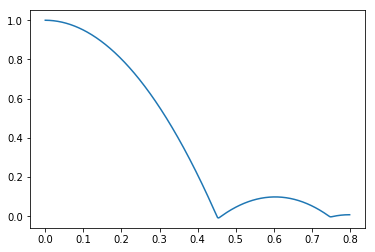

In [14]:
plt.figure()
plt.plot(1.e-3*np.arange(N), qz)

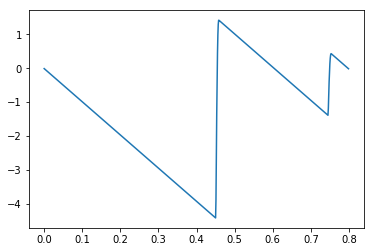

In [16]:
plt.figure()
plt.plot(1.e-3*np.arange(N), dqz)